## **Test Model**

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3wRryPqV5b0kmgy3kmxJ")
project = rf.workspace("ada-12lh1").project("toyota-detection-whdkj")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Toyota-Detection-2 in yolov8:: 100%|██████████| 248/248 [00:00<00:00, 5965.47it/s]


### **Train YOLO on Roboflow Dataset**

In [14]:
from ultralytics import YOLO

# Load YOLOv8 model (nano, small, medium, large)
model = YOLO("yolov8n.pt")  # start with nano for quick tests

# Train the model
model.train(
    data="Toyota-Detection-2/data.yaml",  # path to Roboflow YOLOv8 dataset yaml
    epochs=50,
    imgsz=512,
    name="toyota_train_v1"
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Toyota-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=toyota_train_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4e41cf9790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/car24.jpeg: 512x384 1 toyota, 134.4ms
Speed: 3.1ms preprocess, 134.4ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 384)
Results saved to /content/runs/detect/predict2


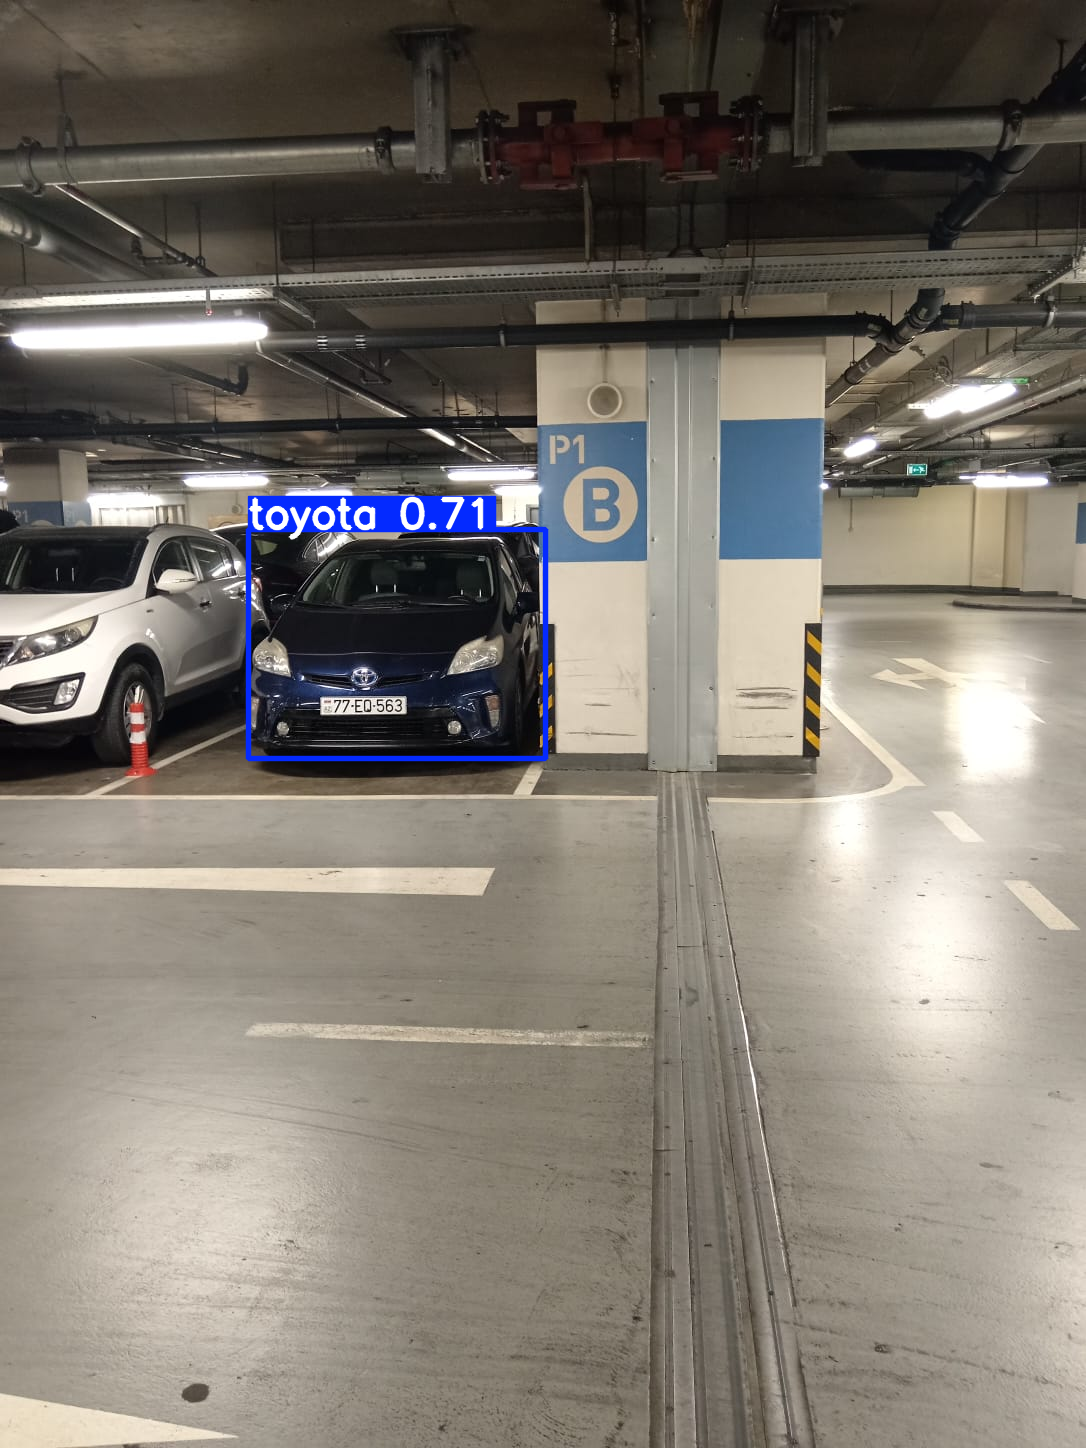

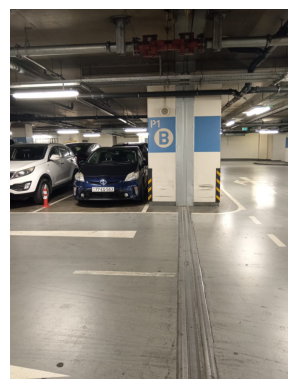

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Load your trained YOLOv8 model
model = YOLO('/content/runs/detect/toyota_train_v1/weights/best.pt')  # trained weights

# 2. Path to your test image
test_image = '/content/car24.jpeg'

# 3. Run inference
results = model.predict(source=test_image, conf=0.25, save=True)  # returns a list

# 4. Show the predictions inline
results[0].show()  # access the first image's results

# 5. Optional: Display using matplotlib
img = cv2.imread(test_image)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
